In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('bodyPerformanceI.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,F,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,C
1,27.0,F,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,D
2,23.0,M,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,C
3,31.0,M,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,C
4,25.0,M,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,M,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,B
7011,56.0,M,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,B
7012,26.0,M,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,A
7013,49.0,M,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,C


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7015 non-null   float64
 1   gender                   7015 non-null   object 
 2   height_cm                7015 non-null   float64
 3   weight_kg                7015 non-null   float64
 4   body fat_%               7015 non-null   float64
 5   diastolic                7015 non-null   float64
 6   systolic                 7015 non-null   float64
 7   gripForce                7015 non-null   float64
 8   sit and bend forward_cm  7015 non-null   float64
 9   sit-ups counts           7015 non-null   float64
 10  broad jump_cm            7015 non-null   float64
 11  class                    7015 non-null   object 
dtypes: float64(10), object(2)
memory usage: 657.8+ KB


In [93]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [94]:
df['gender'].value_counts()

M    4552
F    2463
Name: gender, dtype: int64

In [95]:
df['class'].value_counts()

B    3222
C    2565
A     617
D     611
Name: class, dtype: int64

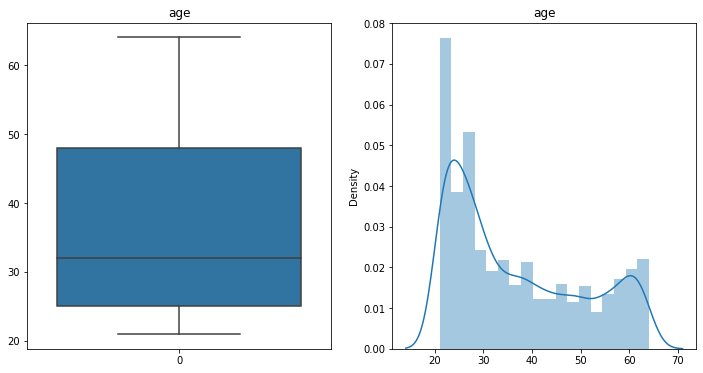

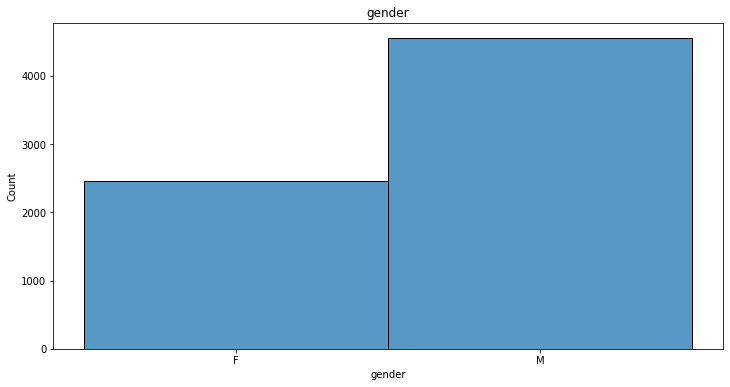

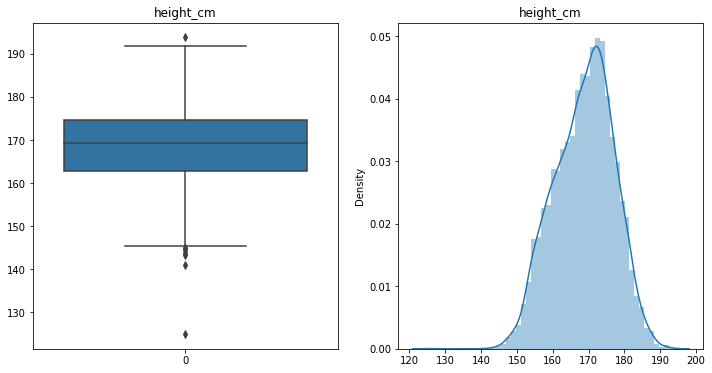

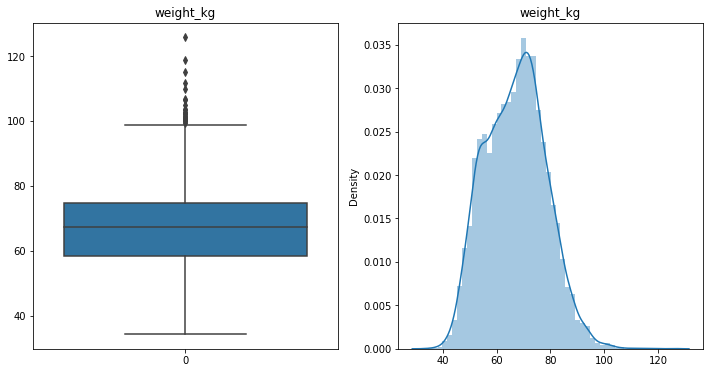

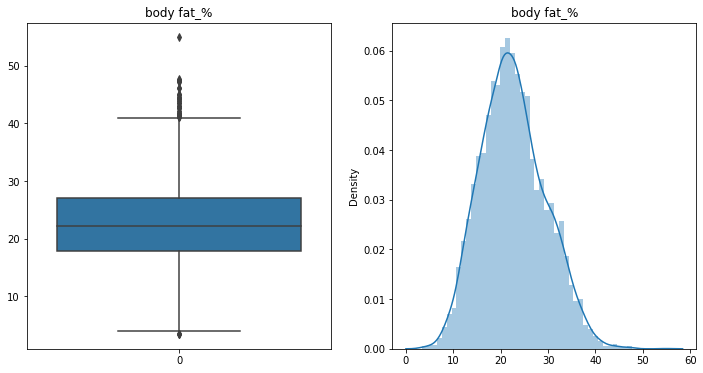

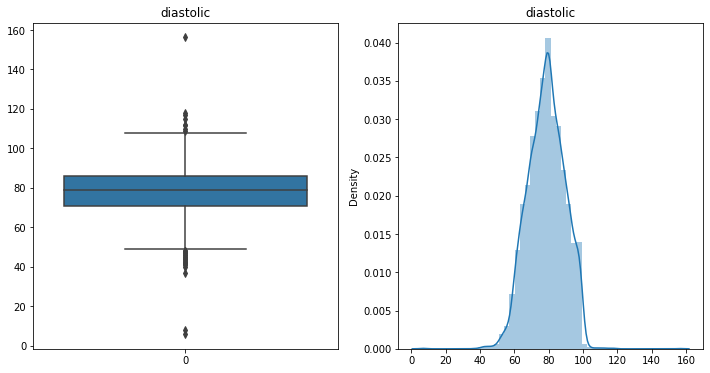

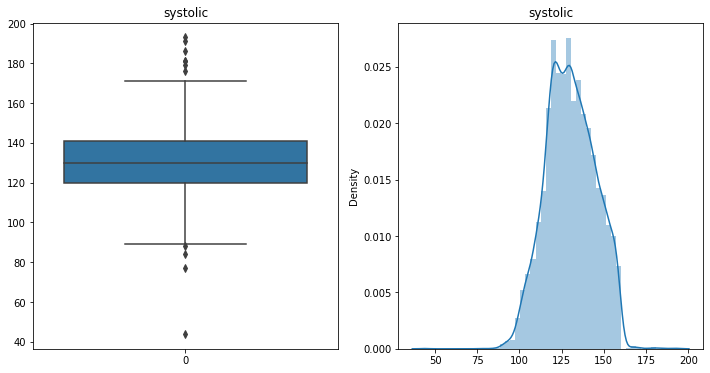

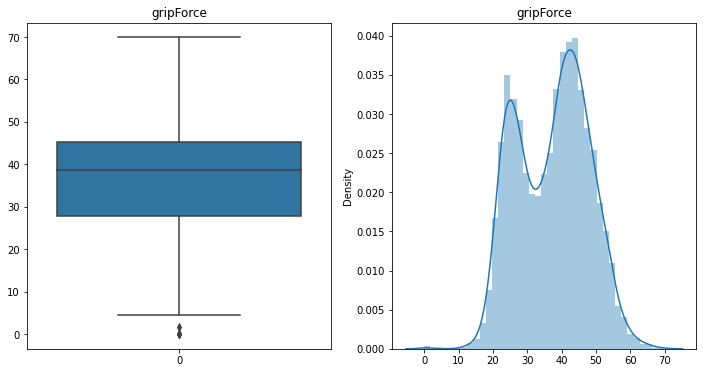

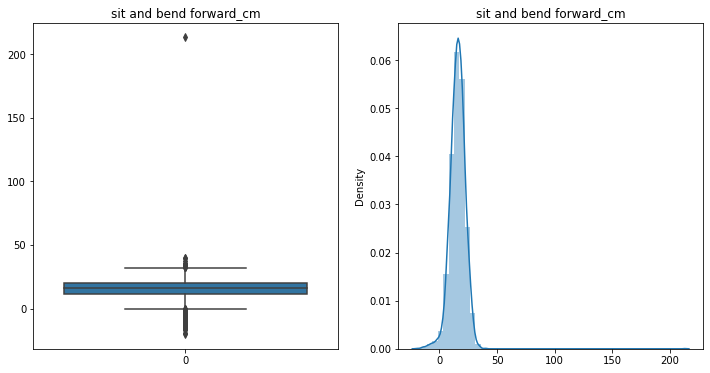

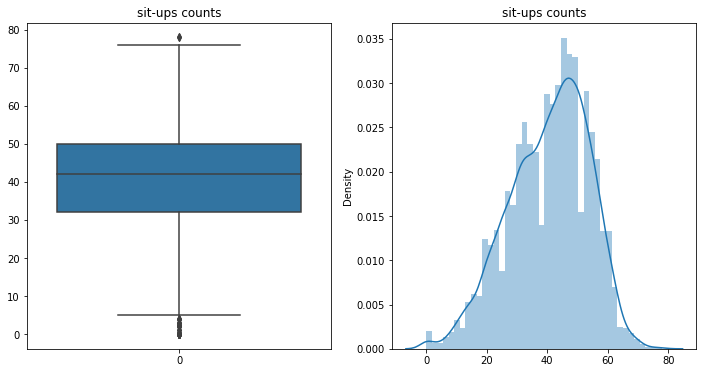

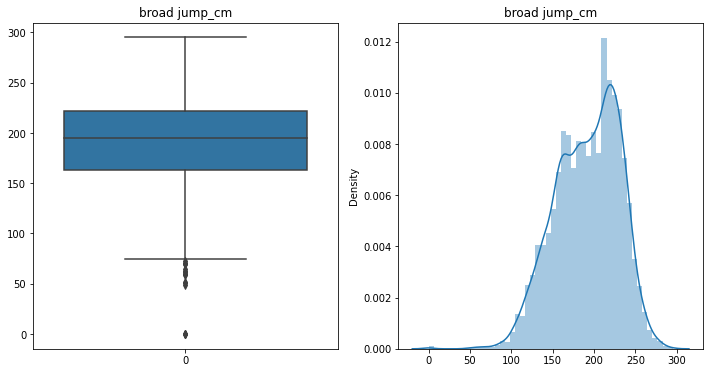

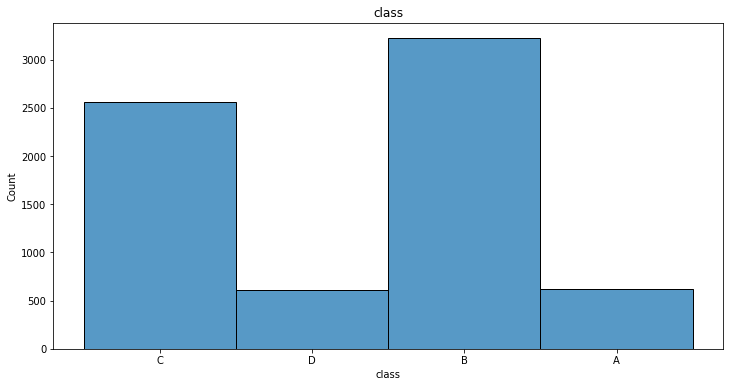

In [96]:
for column in df.columns:
    if df[column].dtype == 'object':
        fig, ax = plt.subplots(figsize=(12, 6))
        ax = sns.histplot(data=df[column])
        ax.set_title(column)
    elif df[column].dtype == 'float64':
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        sns.boxplot(data=df[column], ax=ax[0])
        ax[0].set_title(column)
        
        sns.distplot(x=df[column], ax=ax[1]);
        ax[1].set_title(column)

In [97]:
new_df = df.copy()
new_df['gender'] = df['gender'].replace({'M': 0, 'F': 1})
new_df['class'] =  df['class'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3})
new_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,2
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,3
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,2
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,2
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,1
7011,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,1
7012,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,0
7013,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,2


<AxesSubplot:>

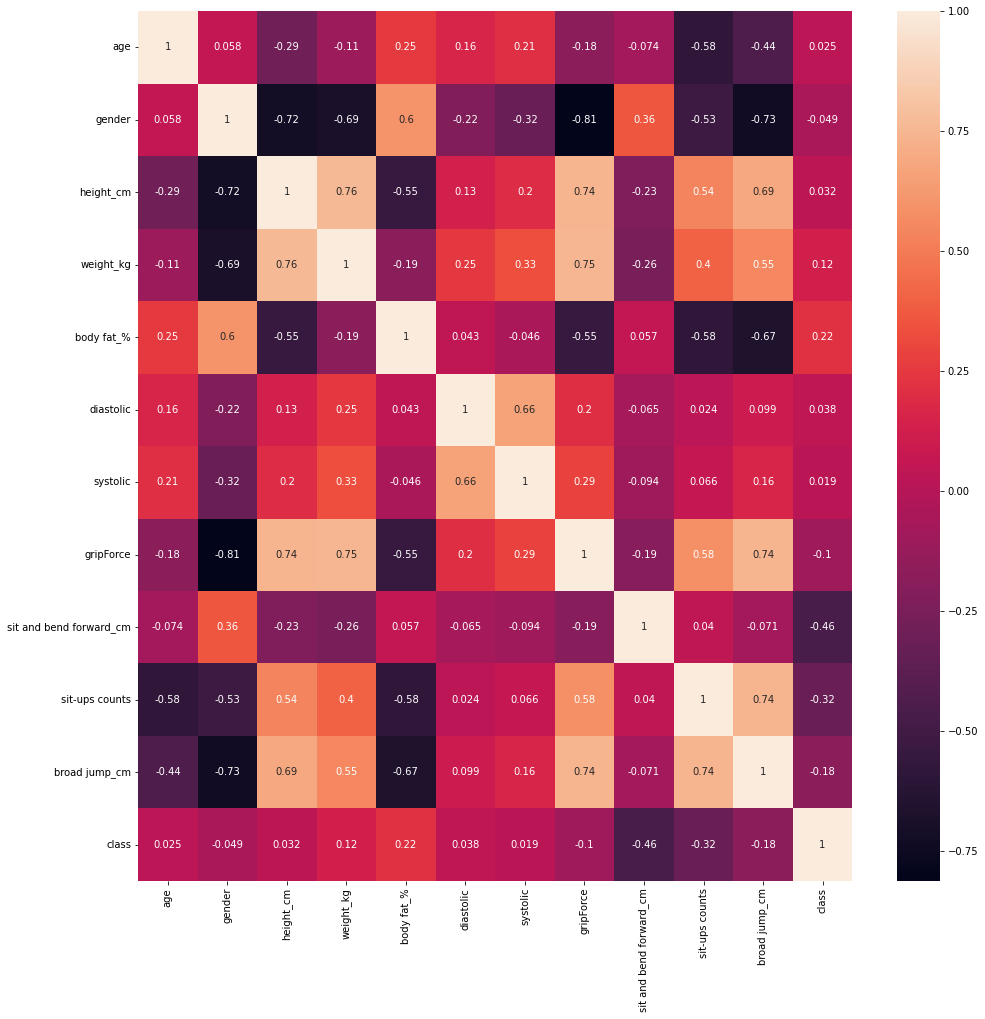

In [98]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(new_df.corr(), ax=ax, annot=True)

In [99]:
corr = new_df.corr()
unstacked = corr.unstack()
for e, u in enumerate(unstacked):
    if u == 1:
        unstacked[e] = 0

In [100]:
#Max absolute correlation
unstacked.abs().sort_values(ascending=False)

gender      gripForce     0.811698
gripForce   gender        0.811698
weight_kg   height_cm     0.761105
height_cm   weight_kg     0.761105
weight_kg   gripForce     0.752092
                            ...   
body fat_%  body fat_%    0.000000
weight_kg   weight_kg     0.000000
height_cm   height_cm     0.000000
gender      gender        0.000000
class       class         0.000000
Length: 144, dtype: float64

In [101]:
#Max positive correlation
unstacked.sort_values(ascending=False)

weight_kg       height_cm        0.761105
height_cm       weight_kg        0.761105
weight_kg       gripForce        0.752092
gripForce       weight_kg        0.752092
sit-ups counts  broad jump_cm    0.740434
                                   ...   
height_cm       gender          -0.723391
broad jump_cm   gender          -0.727814
gender          broad jump_cm   -0.727814
                gripForce       -0.811698
gripForce       gender          -0.811698
Length: 144, dtype: float64

In [102]:
#Max negative correlation
unstacked.sort_values(ascending=True)

gripForce      gender           -0.811698
gender         gripForce        -0.811698
               broad jump_cm    -0.727814
broad jump_cm  gender           -0.727814
height_cm      gender           -0.723391
                                   ...   
broad jump_cm  sit-ups counts    0.740434
weight_kg      gripForce         0.752092
gripForce      weight_kg         0.752092
weight_kg      height_cm         0.761105
height_cm      weight_kg         0.761105
Length: 144, dtype: float64

In [103]:
# Max absolute correlation for target feature class
corr.loc[corr.index == 'class'].abs().max().sort_values(ascending=False)[1:]

sit and bend forward_cm    0.459989
sit-ups counts             0.317935
body fat_%                 0.216034
broad jump_cm              0.180268
weight_kg                  0.122481
gripForce                  0.100442
gender                     0.049443
diastolic                  0.037550
height_cm                  0.031961
age                        0.024815
systolic                   0.019069
dtype: float64

In [104]:
# Max positive correlation for target feature class
corr.loc[corr.index == 'class'].max().sort_values(ascending=False)[1:]

body fat_%                 0.216034
weight_kg                  0.122481
diastolic                  0.037550
height_cm                  0.031961
age                        0.024815
systolic                   0.019069
gender                    -0.049443
gripForce                 -0.100442
broad jump_cm             -0.180268
sit-ups counts            -0.317935
sit and bend forward_cm   -0.459989
dtype: float64

In [105]:
# Max negative correlation for target feature class
corr.loc[corr.index == 'class'].min().sort_values(ascending=True)

sit and bend forward_cm   -0.459989
sit-ups counts            -0.317935
broad jump_cm             -0.180268
gripForce                 -0.100442
gender                    -0.049443
systolic                   0.019069
age                        0.024815
height_cm                  0.031961
diastolic                  0.037550
weight_kg                  0.122481
body fat_%                 0.216034
class                      1.000000
dtype: float64

In [106]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, f1_score,
                             precision_score, recall_score, roc_auc_score)
from xgboost import XGBClassifier
from xgboost import plot_importance
import numpy as np

In [107]:
def xgb_run(data):
    full_preds = np.zeros(len(data))
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        x_train, y_train = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        x_val, y_val = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']

        model = XGBClassifier(silent=True, verbosity=0)
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)
        full_preds[y_val.index] = predictions

        print(f'\nfold: {fold + 1}, accuracy: {accuracy_score(predictions, y_val)}')
        print(f'fold: {fold + 1}, f1-score-macro: {f1_score(y_val, predictions, average="macro")}')
        print(f'fold: {fold + 1}, f1-score-weighted: {f1_score(y_val, predictions, average="weighted")}')
        if fold == 4:
            plot_importance(model)
        
    return full_preds


fold: 1, accuracy: 0.729151817533856
fold: 1, f1-score-macro: 0.676602706488473
fold: 1, f1-score-weighted: 0.7234101471759421

fold: 2, accuracy: 0.7348538845331433
fold: 2, f1-score-macro: 0.682222809796823
fold: 2, f1-score-weighted: 0.7292187832624805

fold: 3, accuracy: 0.7263007840342124
fold: 3, f1-score-macro: 0.6738540676703128
fold: 3, f1-score-weighted: 0.7225553620868663

fold: 4, accuracy: 0.7441197434069851
fold: 4, f1-score-macro: 0.6708930789680724
fold: 4, f1-score-weighted: 0.7365863027836919

fold: 5, accuracy: 0.744832501781896
fold: 5, f1-score-macro: 0.690297914305067
fold: 5, f1-score-weighted: 0.74105577000352


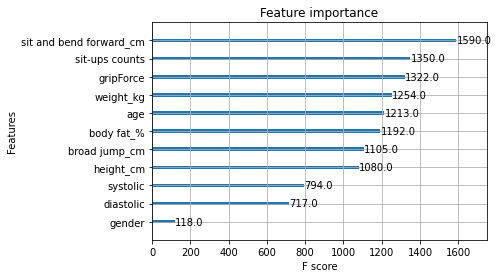

In [108]:
preds = xgb_run(new_df)

<AxesSubplot:>

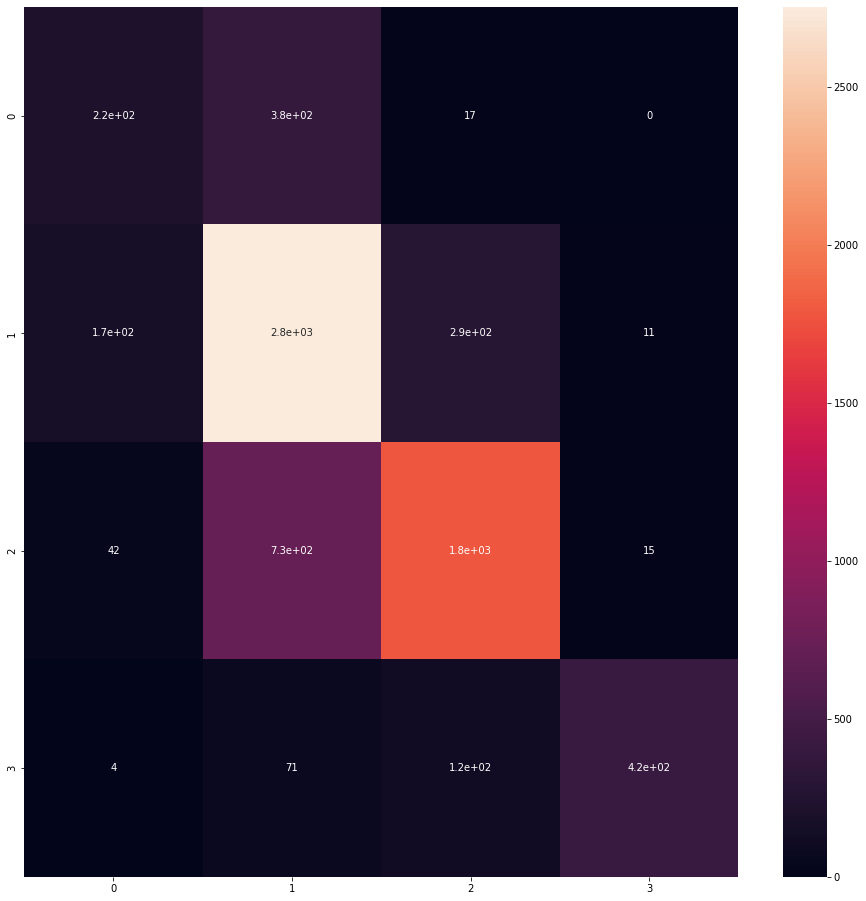

In [20]:
conf_matrix = confusion_matrix(new_df['class'], preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

In [21]:
print(classification_report(new_df['class'], preds))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41       617
           1       0.70      0.85      0.77      3222
           2       0.81      0.69      0.75      2565
           3       0.94      0.68      0.79       611

    accuracy                           0.74      7015
   macro avg       0.74      0.64      0.68      7015
weighted avg       0.74      0.74      0.73      7015



In [109]:
# I used copypaste with little changes from here https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
import optuna
import xgboost as xgb
import numpy as np

def objective(trial, data, metric_func):
    pred_vals = np.zeros(len(data))
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        train_x, train_y = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        valid_x, valid_y = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dvalid = xgb.DMatrix(valid_x, label=valid_y)

        param = {
            "verbosity": 0,
            #"objective": "multi:softprob",
            "objective": "binary:logistic",
            #"eval_metric": "merror",
            #"num_class": len(data['class'].unique()),
            # use exact for small dataset.
            "tree_method": "exact",
            # defines booster, gblinear for linear functions.
            "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
            # L2 regularization weight.
            "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            # L1 regularization weight.
            "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            # sampling ratio for training data.
            "subsample": trial.suggest_float("subsample", 0.2, 1.0),
            # sampling according to each tree.
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        }

        if param["booster"] in ["gbtree", "dart"]:
            # maximum depth of the tree, signifies complexity of the tree.
            param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
            # minimum child weight, larger the term more conservative the tree.
            param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
            param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
            # defines how selective algorithm is.
            param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
            param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

        bst = xgb.train(param, dtrain)
        preds = bst.predict(dvalid)
        pred_labels = np.rint(preds)
        pred_vals[valid_y.index] = pred_labels
    
    return metric_func(data["class"], pred_vals)

def optuna_with_metric(data, metric_func):
    objective_with_df = lambda trials: objective(trials, data, metric_func)
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_with_df, n_trials=200)
    
    params = study.best_trial.params
    params['objective'] = 'binary:logistic'
    #params['eval_metric'] = 'merror'
    #params['num_class'] = 4
    accuracy_vals = np.zeros(len(new_df))

    models = []

    pred_vals = np.zeros(len(data))
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        train_x, train_y = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        valid_x, valid_y = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dvalid = xgb.DMatrix(valid_x, label=valid_y)

        models.append(xgb.train(params, dtrain))
        preds = models[fold].predict(dvalid)
        pred_labels = np.rint(preds)
        pred_vals[valid_y.index] = pred_labels
    
    return pred_vals

In [28]:
import pickle

params = study.best_trial.params
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'merror'
params['num_class'] = 4
accuracy_vals = np.zeros(len(new_df))

models = []

accuracy_vals = np.zeros(len(new_df))
kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
for fold, (trn_ind, val_ind) in enumerate(kfold.split(new_df.drop('class', axis=1), new_df['class'])):
    train_x, train_y = new_df.loc[trn_ind].drop('class', axis=1), new_df.loc[trn_ind, 'class']
    valid_x, valid_y = new_df.loc[val_ind].drop('class', axis=1), new_df.loc[val_ind, 'class']
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)
    
    models.append(xgb.train(params, dtrain))
    preds = models[fold].predict(dvalid)
    pred_labels = np.argmax(preds, axis=1)
    accuracy_vals[valid_y.index] = pred_labels
    
    pickle.dump(models[fold], open(f'models/xgb_model{fold}.pkl', "wb"))

print(f'accuracy: {accuracy_score(new_df["class"], accuracy_vals)}')

accuracy: 0.7371347113328581


In [ ]:
# I can't improove model. No one attempt of improvements didn't get better results.

In [49]:
a_vs_all_df = new_df.copy()
a_vs_all_df['class'] = a_vs_all_df['class'].replace({0: 1, 1: 0, 2: 0, 3: 0})
a_vs_all_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,0
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,0
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,0
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,0
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,0
7011,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,0
7012,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,1
7013,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,0


In [50]:
b_vs_all_df = new_df.copy()
b_vs_all_df['class'] = b_vs_all_df['class'].replace({0: 0, 1: 1, 2: 0, 3: 0})
b_vs_all_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,0
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,0
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,0
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,0
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,1
7011,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,1
7012,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,0
7013,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,0


In [51]:
c_vs_all_df = new_df.copy()
c_vs_all_df['class'] = c_vs_all_df['class'].replace({0: 0, 1: 0, 2: 1, 3: 0})
c_vs_all_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,1
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,0
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,1
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,1
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,0
7011,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,0
7012,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,0
7013,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,1


In [52]:
d_vs_all_df = new_df.copy()
d_vs_all_df['class'] = d_vs_all_df['class'].replace({0: 0, 1: 0, 2: 0, 3: 1})
d_vs_all_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,1,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,0
1,27.0,1,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,1
2,23.0,0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,0
3,31.0,0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,0
4,25.0,0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,0
7011,56.0,0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,0
7012,26.0,0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,0
7013,49.0,0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,0


In [ ]:
d_vs_all_preds = optuna_with_metric(d_vs_all_df, recall_score)

<AxesSubplot:>

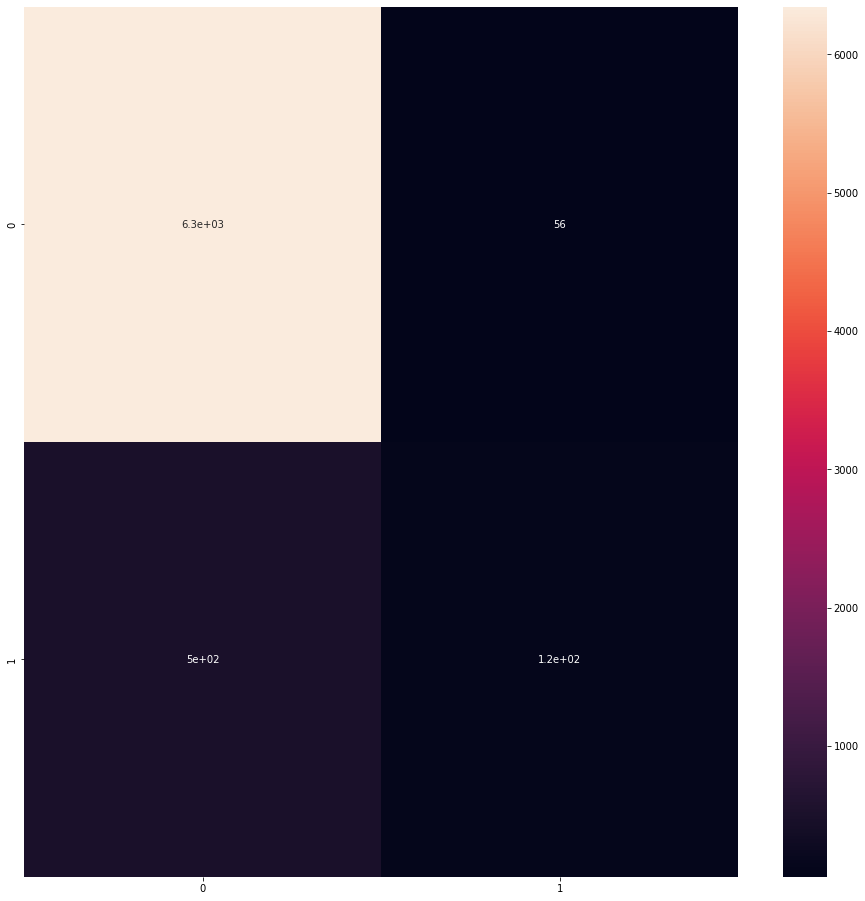

In [66]:
# accuracy_score metric
conf_matrix = confusion_matrix(a_vs_all_df['class'], a_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

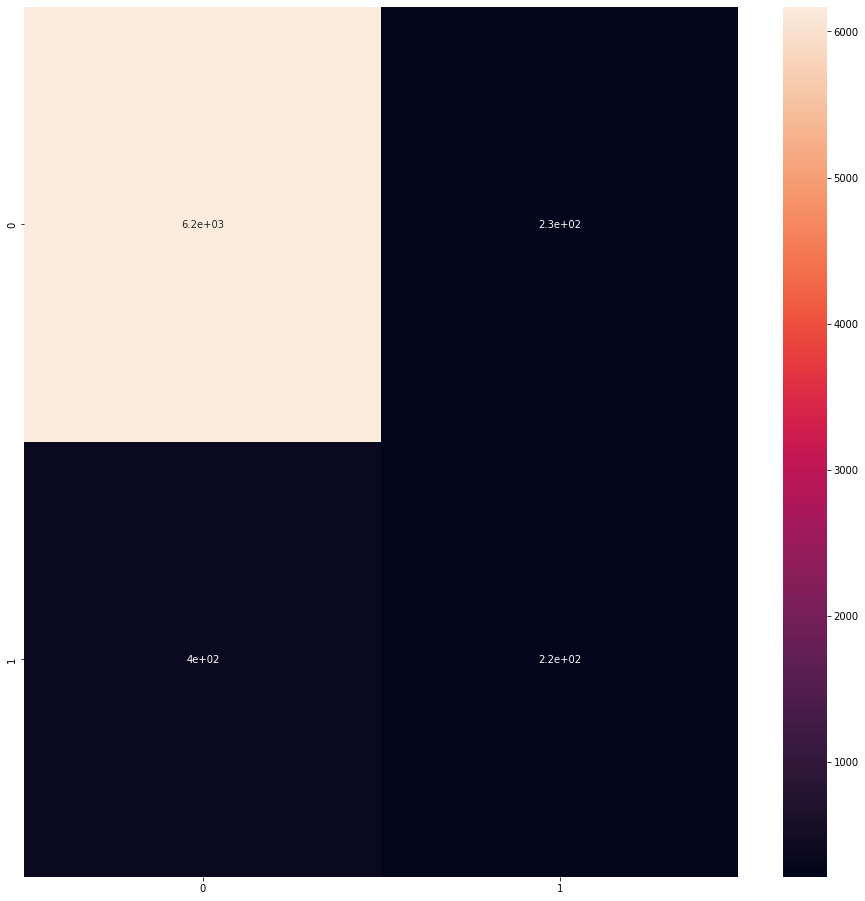

In [69]:
# roc_auc_score metric
conf_matrix = confusion_matrix(a_vs_all_df['class'], a_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

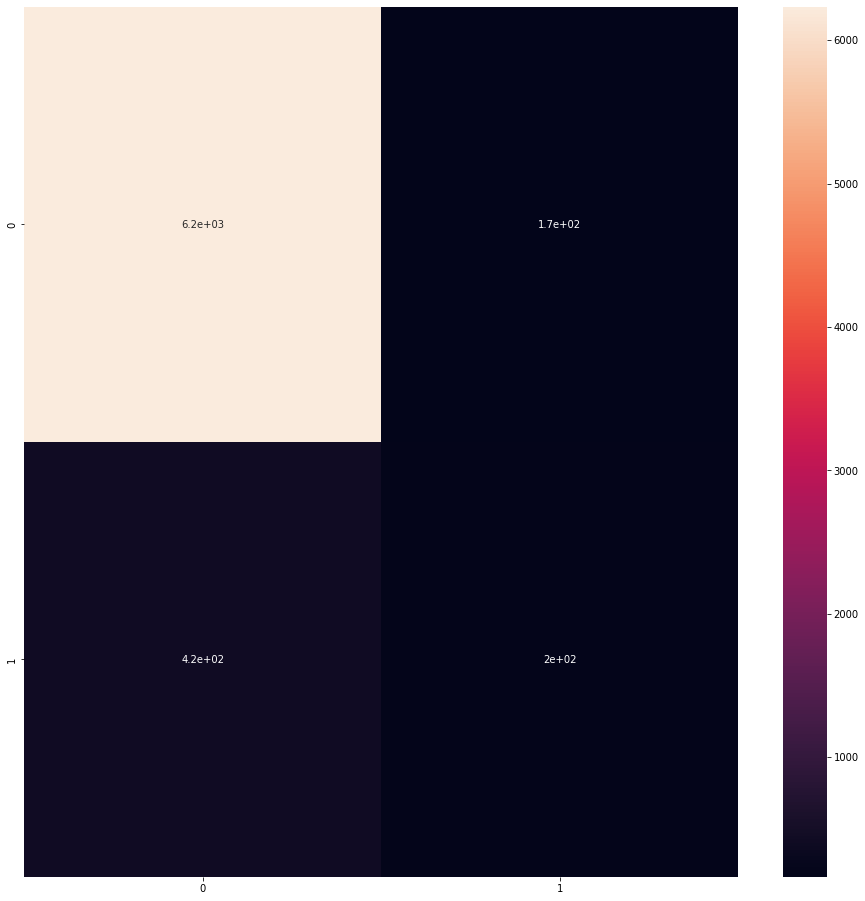

In [71]:
# f1_score metric
conf_matrix = confusion_matrix(a_vs_all_df['class'], a_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

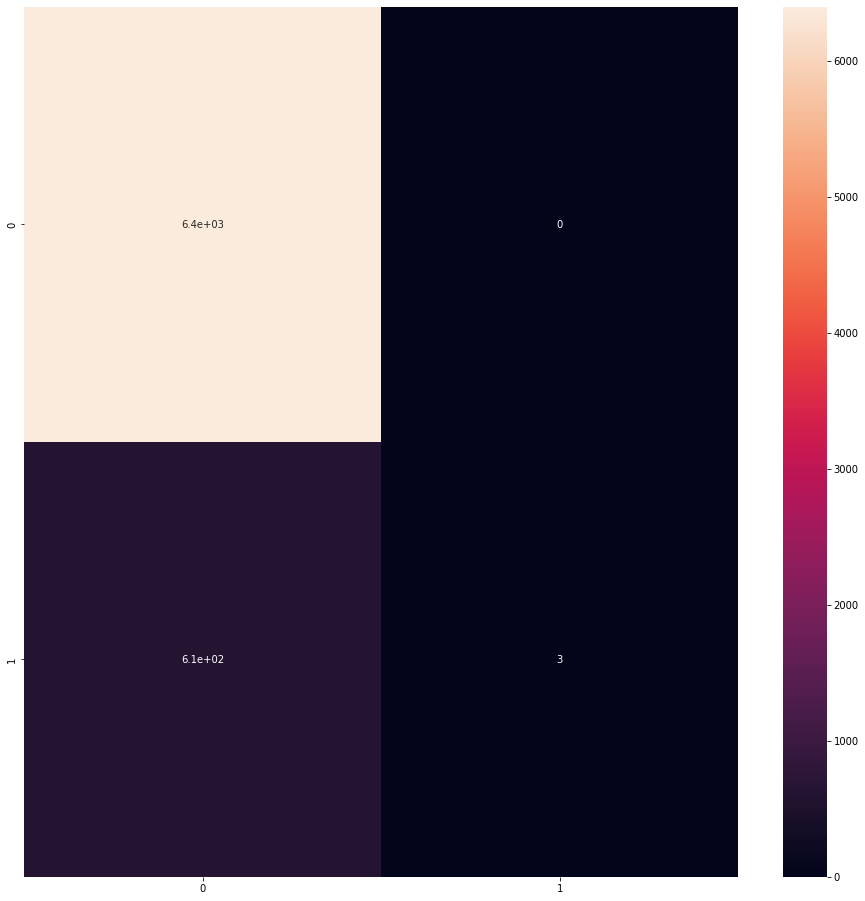

In [73]:
# precision_score metric
conf_matrix = confusion_matrix(a_vs_all_df['class'], a_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

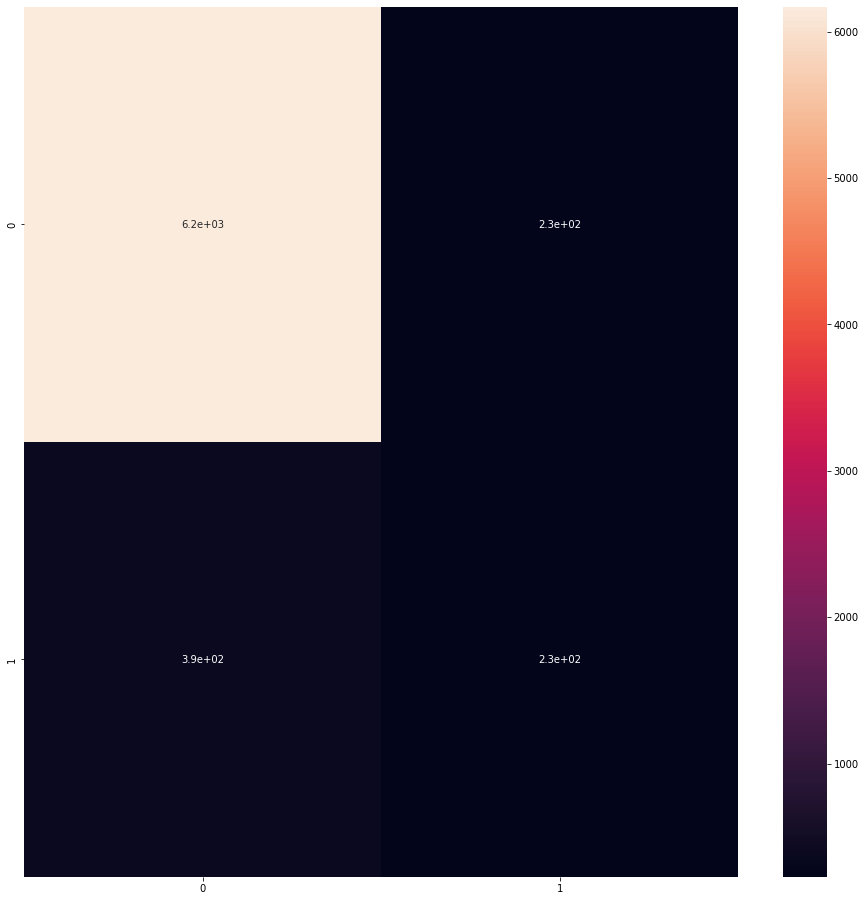

In [75]:
# recall_score metric
conf_matrix = confusion_matrix(a_vs_all_df['class'], a_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# It seems to me that recall_score is the best choice for a_vs_all_df

<AxesSubplot:>

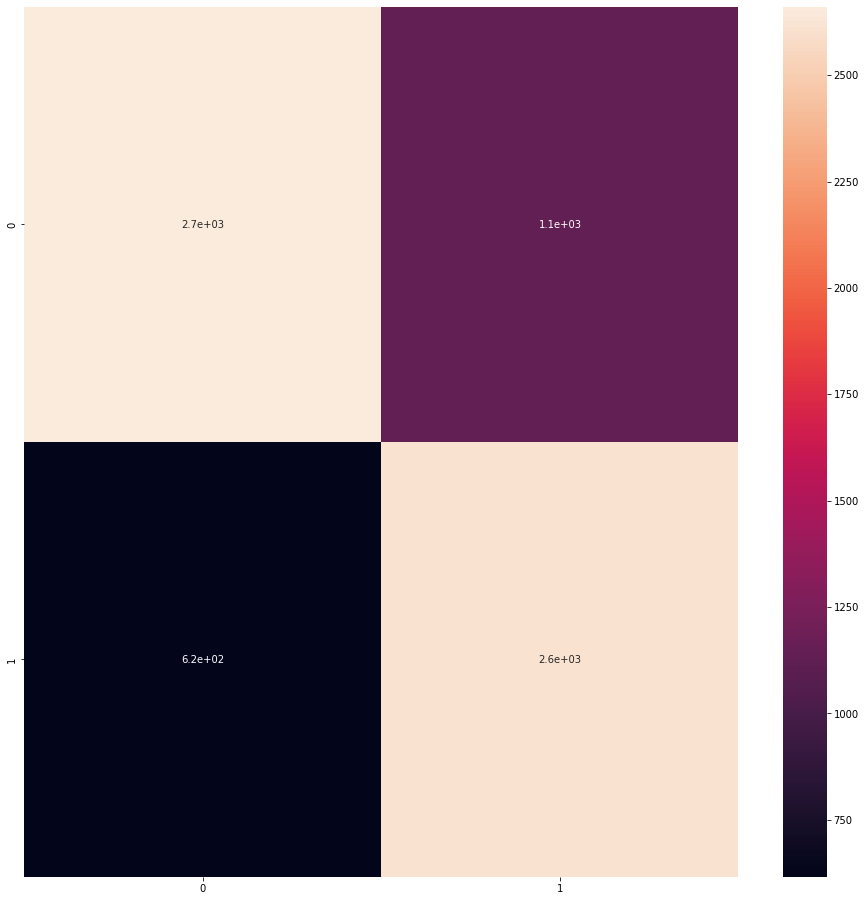

In [112]:
# accuracy_score metric
conf_matrix = confusion_matrix(b_vs_all_df['class'], b_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

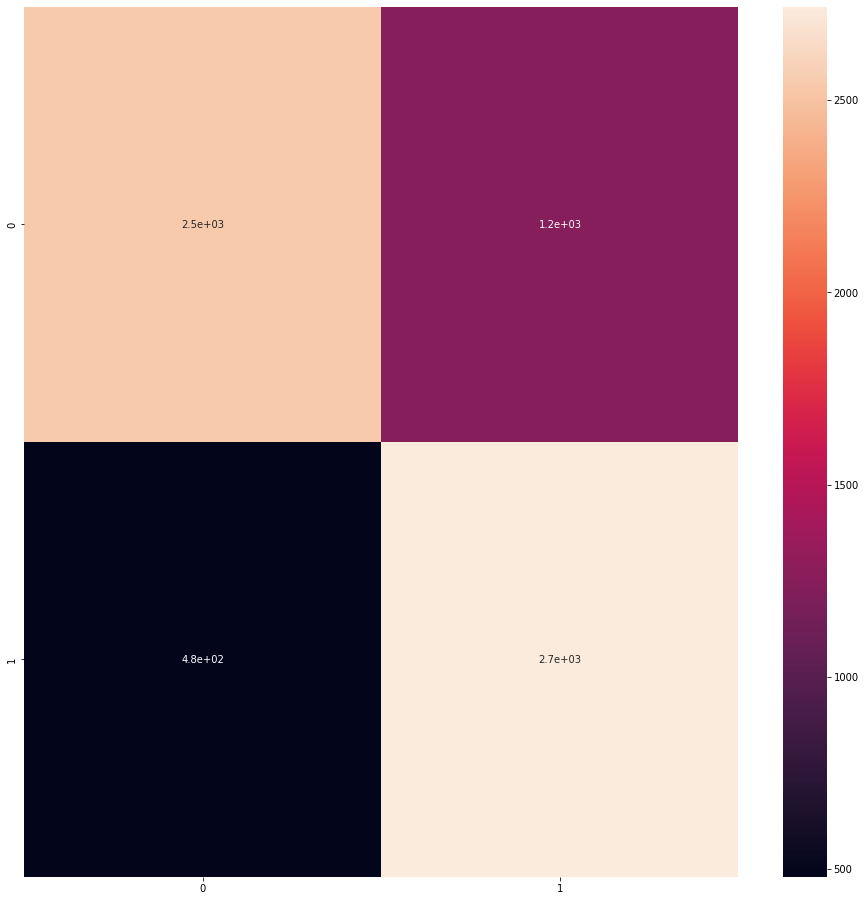

In [114]:
# roc_auc_score metric
conf_matrix = confusion_matrix(b_vs_all_df['class'], b_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

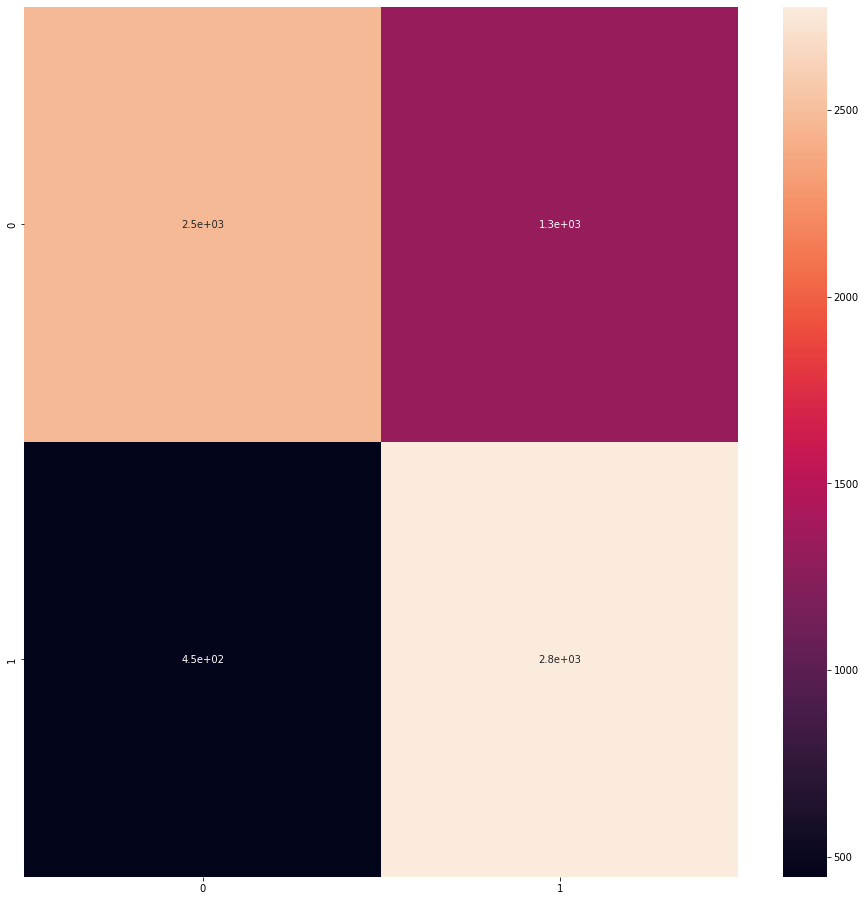

In [116]:
# f1_score metric
conf_matrix = confusion_matrix(b_vs_all_df['class'], b_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

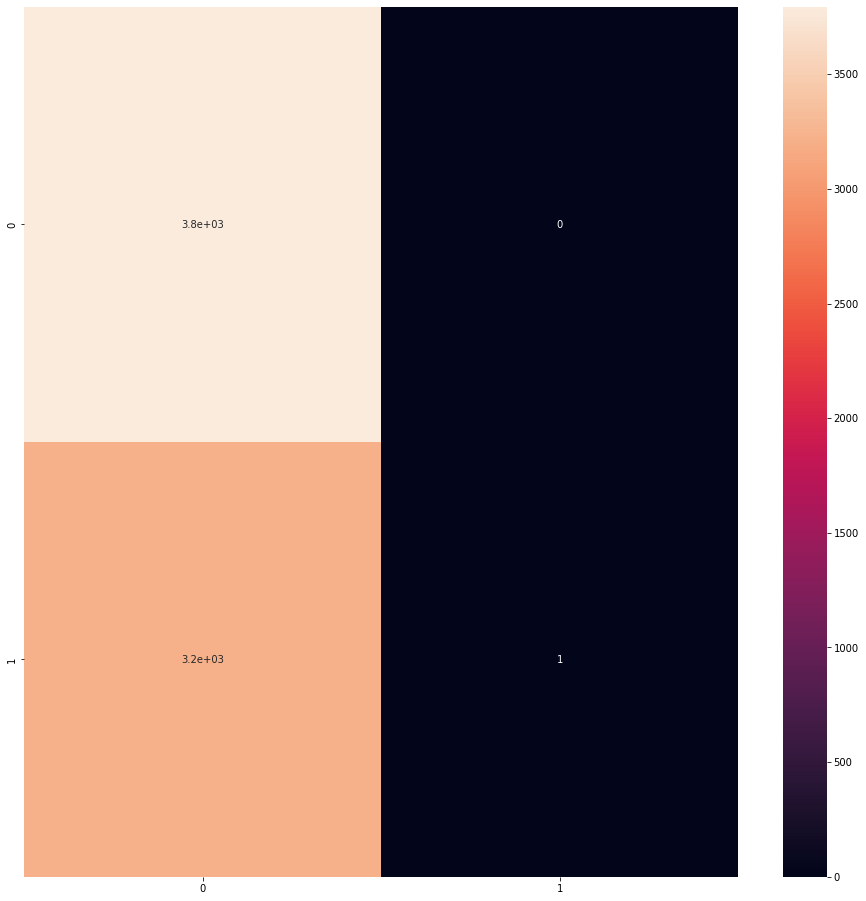

In [118]:
# precision_score metric
conf_matrix = confusion_matrix(b_vs_all_df['class'], b_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

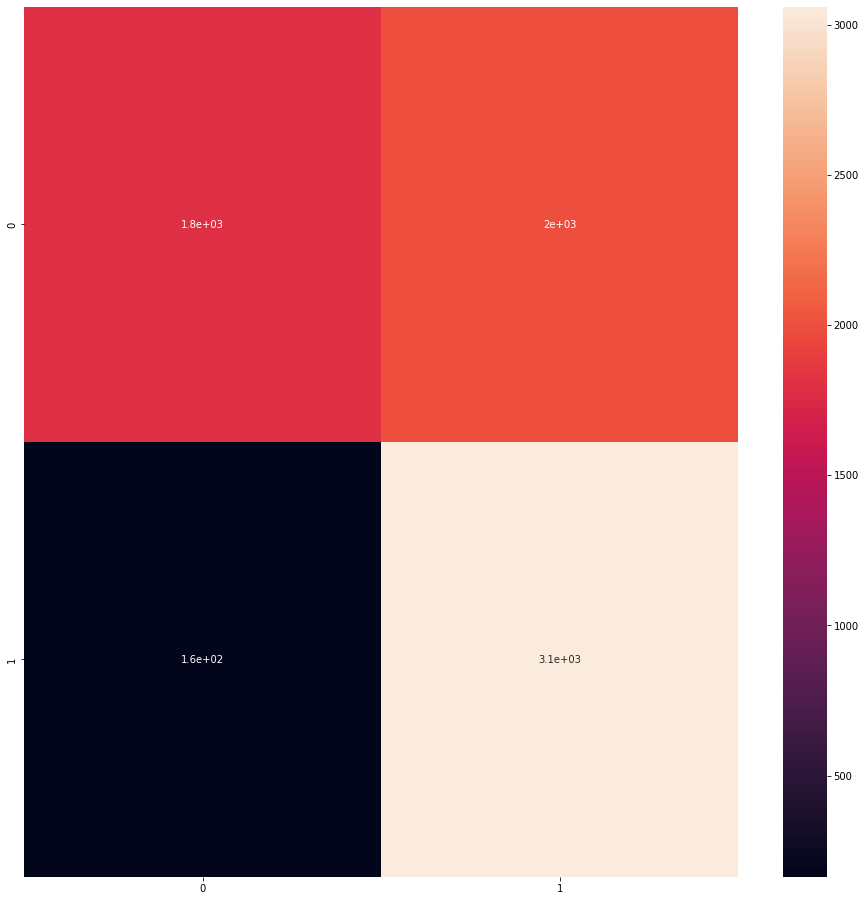

In [120]:
# recall_score metric
conf_matrix = confusion_matrix(b_vs_all_df['class'], b_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# I'll just take f1_score fore b_vs_all_df

<AxesSubplot:>

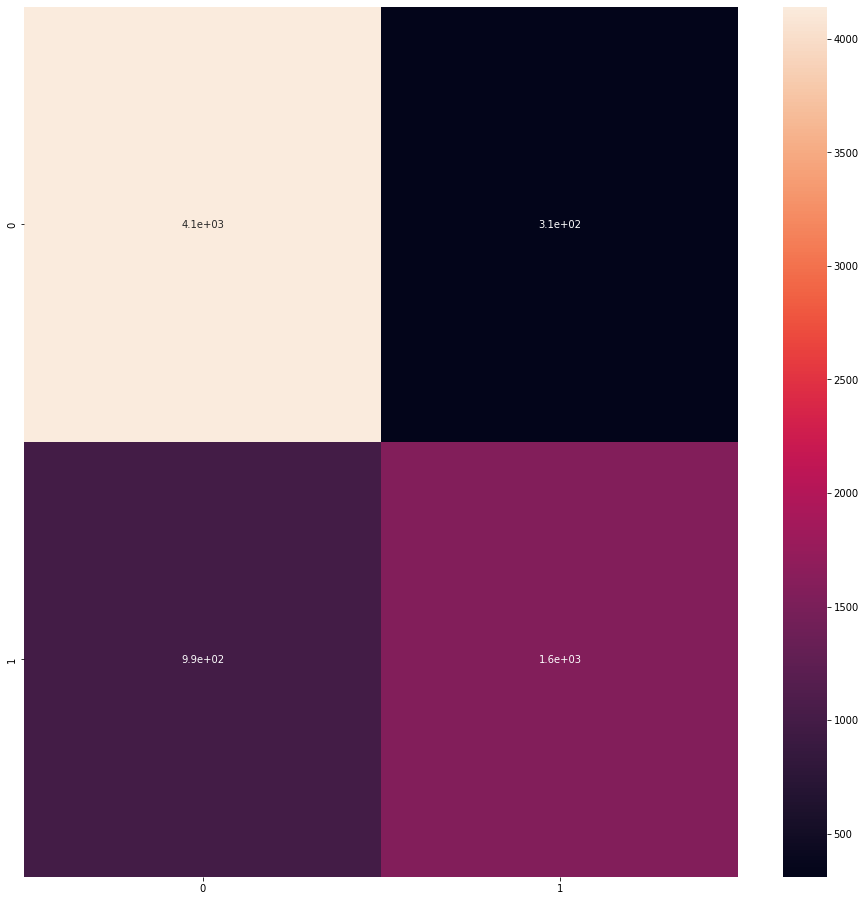

In [122]:
# accuracy_score metric
conf_matrix = confusion_matrix(c_vs_all_df['class'], c_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

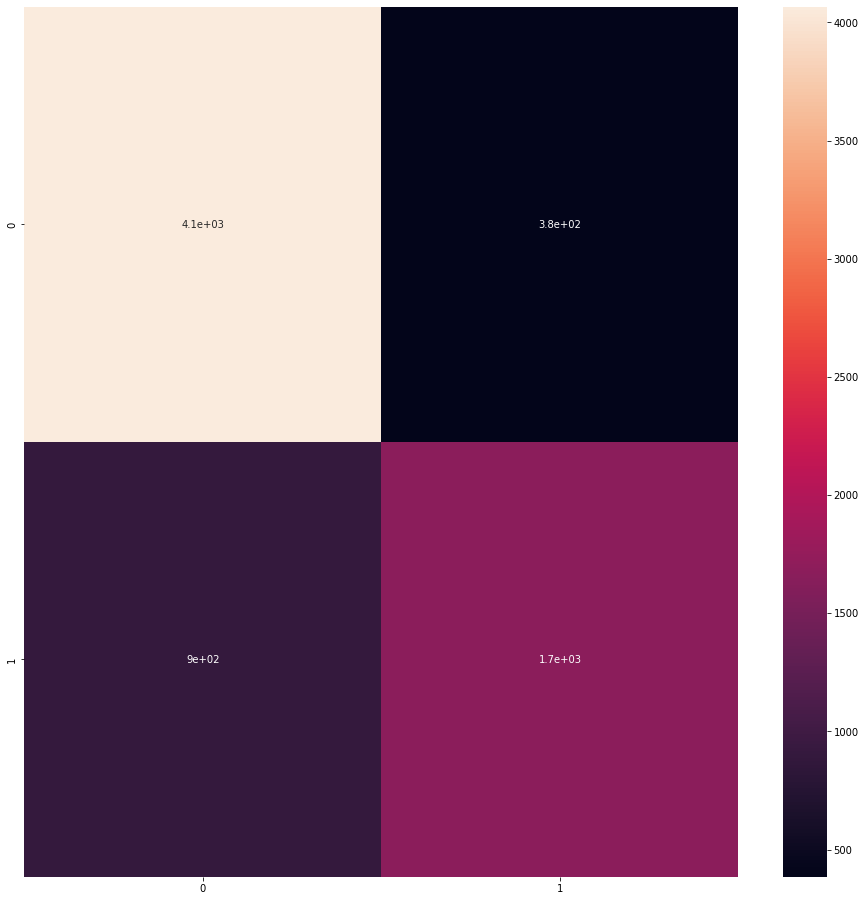

In [124]:
# roc_auc_score metric
conf_matrix = confusion_matrix(c_vs_all_df['class'], c_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

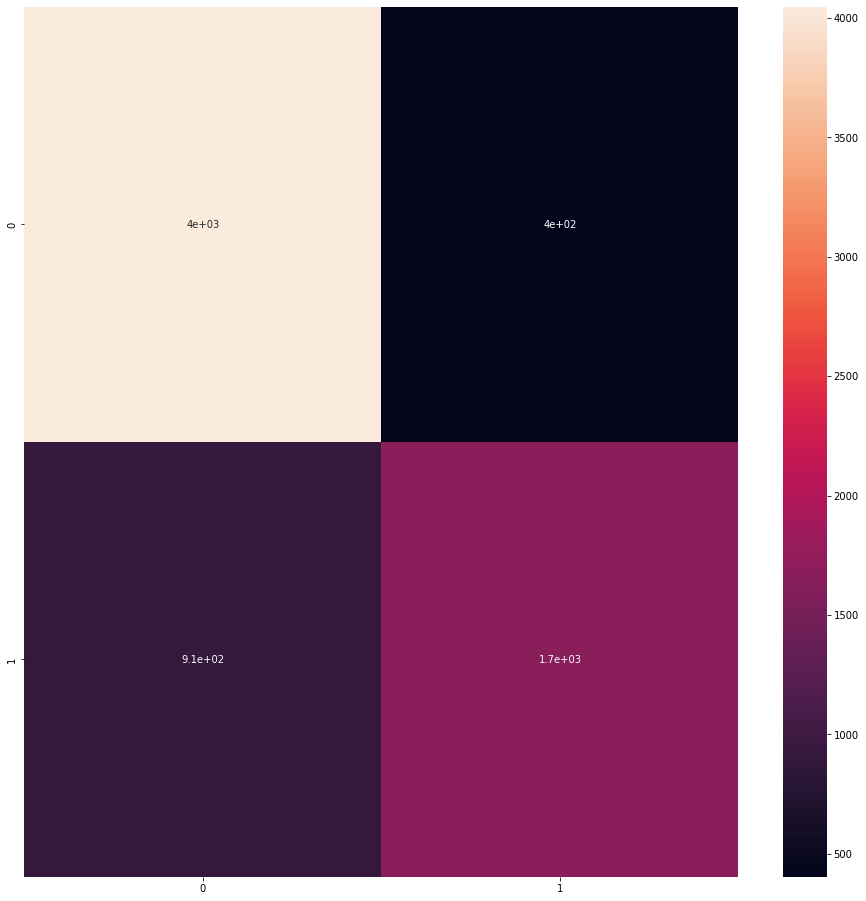

In [126]:
# f1_score metric
conf_matrix = confusion_matrix(c_vs_all_df['class'], c_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

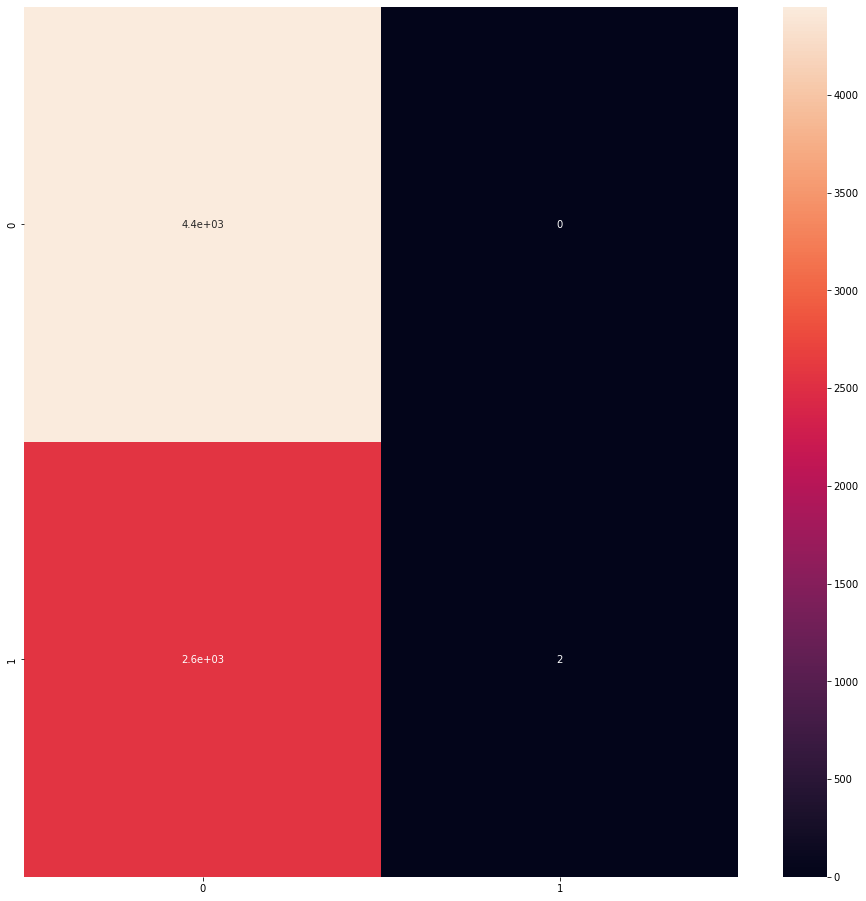

In [128]:
# precision_score metric
conf_matrix = confusion_matrix(c_vs_all_df['class'], c_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

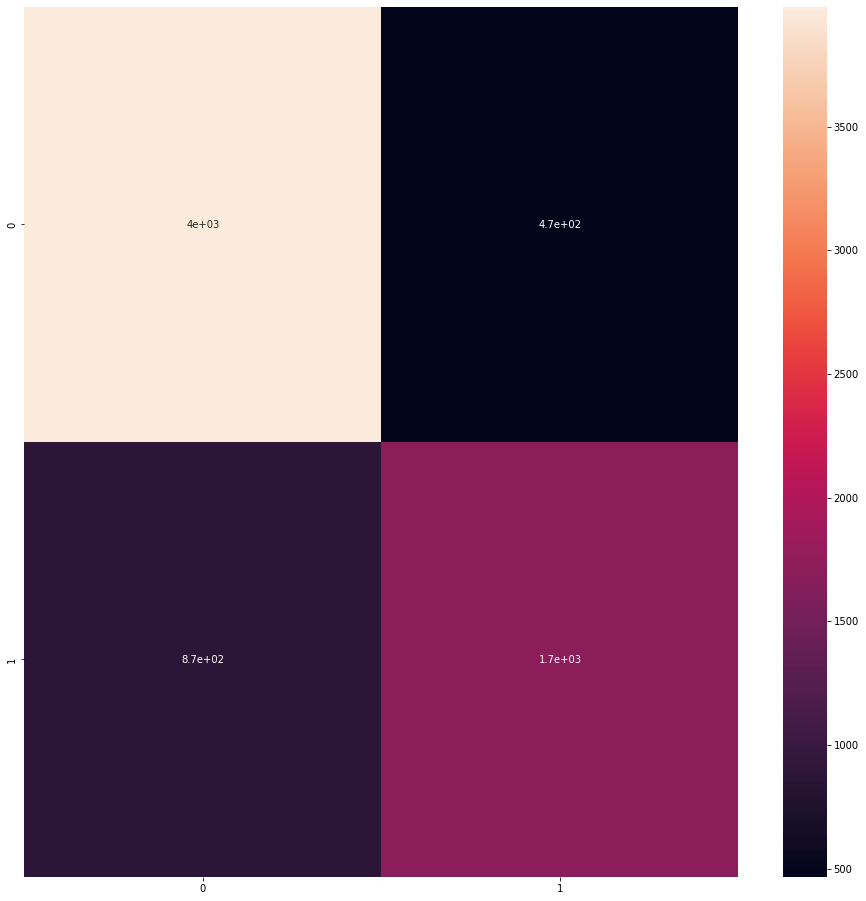

In [130]:
# recall_score metric
conf_matrix = confusion_matrix(c_vs_all_df['class'], c_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# I'll take f1_score for c_vs_all_df

<AxesSubplot:>

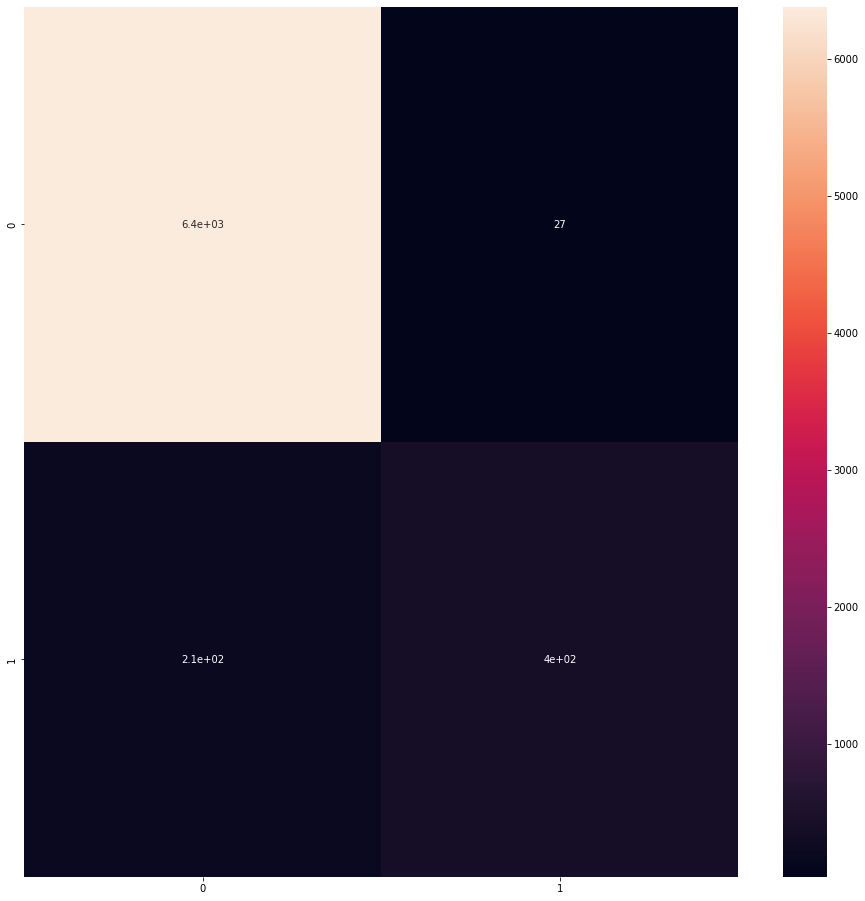

In [133]:
# accuracy_score metric
conf_matrix = confusion_matrix(d_vs_all_df['class'], d_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

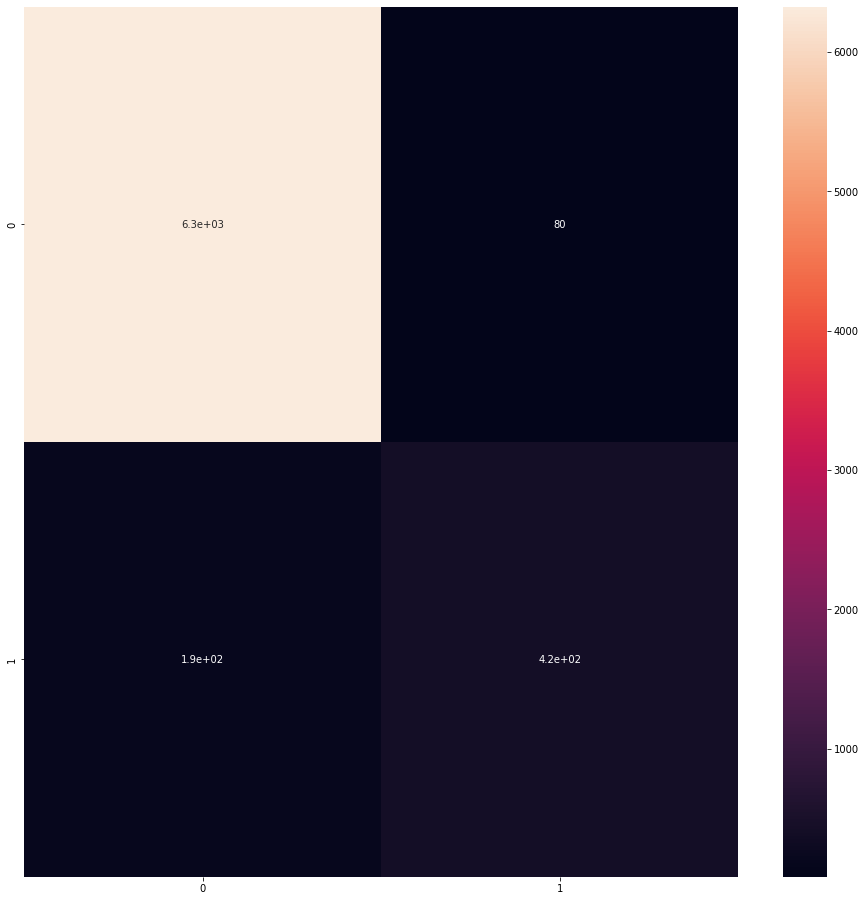

In [135]:
# roc_auc_score metric
conf_matrix = confusion_matrix(d_vs_all_df['class'], d_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

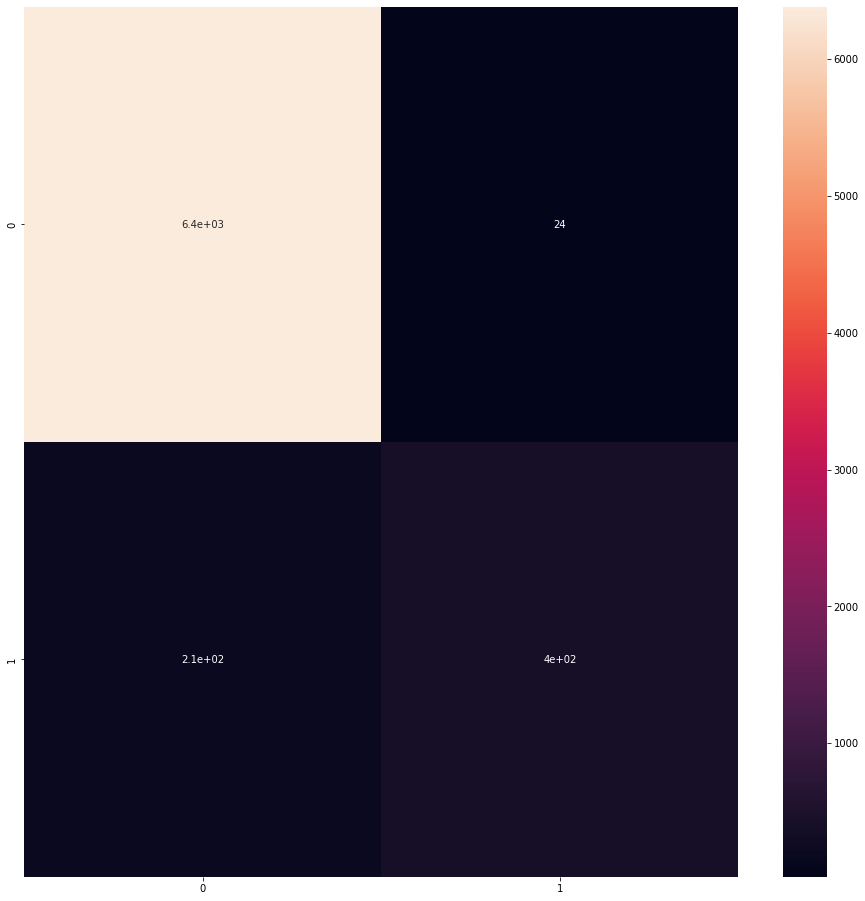

In [137]:
# f1_score metric
conf_matrix = confusion_matrix(d_vs_all_df['class'], d_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

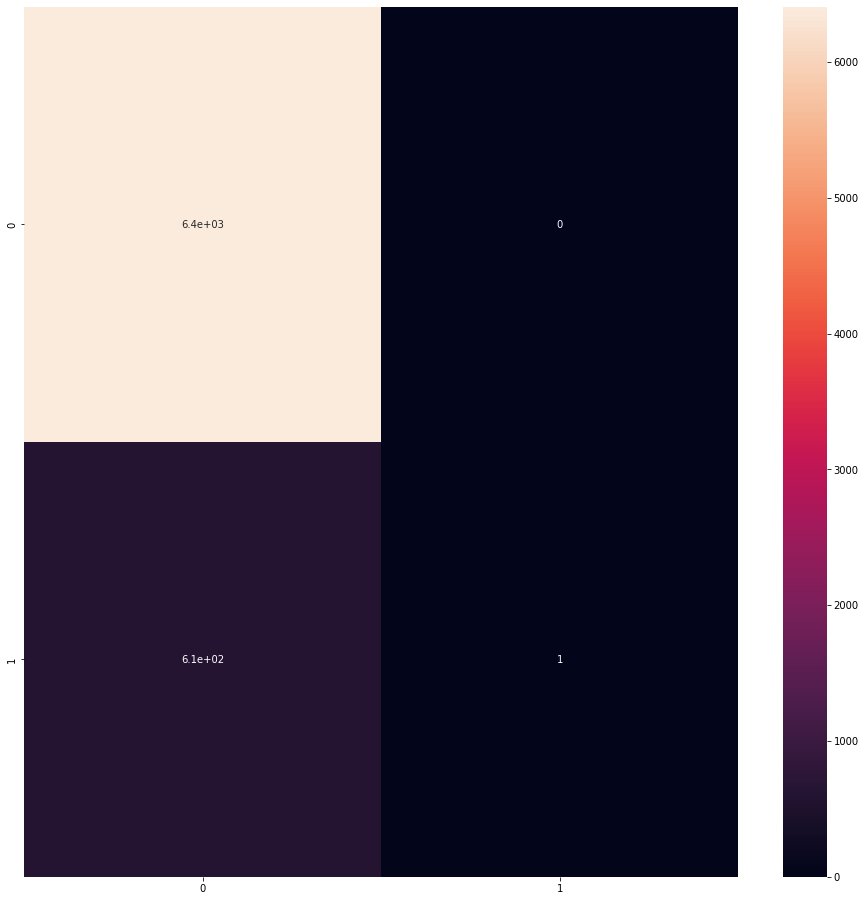

In [139]:
# precision_score metric
conf_matrix = confusion_matrix(d_vs_all_df['class'], d_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:>

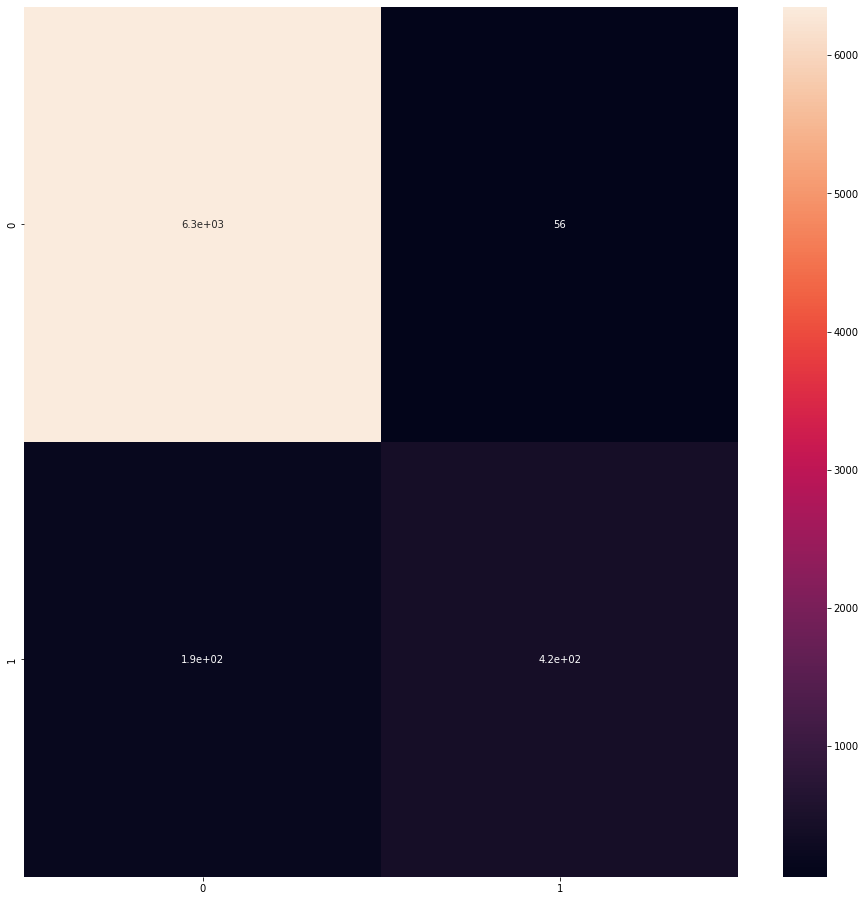

In [141]:
# recall_score metric
conf_matrix = confusion_matrix(d_vs_all_df['class'], d_vs_all_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

In [ ]:
# For d_vs_all_df f1_score

In [ ]:
a_vs_all_preds = optuna_with_metric(a_vs_all_df, recall_score)

In [ ]:
b_vs_all_preds = optuna_with_metric(b_vs_all_df, f1_score)

In [ ]:
c_vs_all_preds = optuna_with_metric(c_vs_all_df, f1_score)

In [ ]:
d_vs_all_preds = optuna_with_metric(d_vs_all_df, f1_score)

In [149]:
a_vs_all_preds
a_vs_all_preds = np.where(a_vs_all_preds == 0.0, -1, a_vs_all_preds)
a_vs_all_preds

array([-1., -1., -1., ...,  1., -1., -1.])

In [150]:
b_vs_all_preds
b_vs_all_preds = np.where(b_vs_all_preds == 0.0, -1, b_vs_all_preds)
b_vs_all_preds

array([ 1., -1.,  1., ...,  1.,  1., -1.])

In [151]:
c_vs_all_preds
c_vs_all_preds = np.where(c_vs_all_preds == 0.0, -1, c_vs_all_preds)
c_vs_all_preds

array([-1.,  1., -1., ..., -1.,  1.,  1.])

In [152]:
d_vs_all_preds
d_vs_all_preds = np.where(d_vs_all_preds == 0.0, -1, d_vs_all_preds)
d_vs_all_preds

array([-1., -1., -1., ..., -1., -1., -1.])

In [203]:
import optuna
import xgboost as xgb
import numpy as np

def objective2(trial, data, metric_func):
    pred_vals = np.zeros(len(data))
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        train_x, train_y = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        valid_x, valid_y = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dvalid = xgb.DMatrix(valid_x, label=valid_y)

        param = {
            "verbosity": 0,
            "objective": "multi:softprob",
            #"objective": "binary:logistic",
            "eval_metric": "merror",
            "num_class": len(data['class'].unique()),
            # use exact for small dataset.
            "tree_method": "exact",
            # defines booster, gblinear for linear functions.
            "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
            # L2 regularization weight.
            "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
            # L1 regularization weight.
            "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
            # sampling ratio for training data.
            "subsample": trial.suggest_float("subsample", 0.2, 1.0),
            # sampling according to each tree.
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        }

        if param["booster"] in ["gbtree", "dart"]:
            # maximum depth of the tree, signifies complexity of the tree.
            param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
            # minimum child weight, larger the term more conservative the tree.
            param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
            param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
            # defines how selective algorithm is.
            param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
            param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

        bst = xgb.train(param, dtrain)
        preds = bst.predict(dvalid)
        pred_labels = np.rint(preds)
        pred_vals[valid_y.index] = np.argmax(pred_labels, axis=1)
    
    return metric_func(data["class"], pred_vals, average="weighted")

def optuna_multiclass(data, metric_func):
    objective_with_df = lambda trials: objective2(trials, data, metric_func)
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_with_df, n_trials=200)
    
    params = study.best_trial.params
    params['objective'] = "multi:softprob"
    params['eval_metric'] = 'merror'
    params['num_class'] = 4
    accuracy_vals = np.zeros(len(new_df))

    models = []

    pred_vals = np.zeros((len(data), 4))
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(data.drop('class', axis=1), data['class'])):
        train_x, train_y = data.loc[trn_ind].drop('class', axis=1), data.loc[trn_ind, 'class']
        valid_x, valid_y = data.loc[val_ind].drop('class', axis=1), data.loc[val_ind, 'class']
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dvalid = xgb.DMatrix(valid_x, label=valid_y)

        models.append(xgb.train(params, dtrain))
        preds = models[fold].predict(dvalid)
        #pred_labels = np.rint(preds)
        #print(f'preds: {preds.shape}')
        #print(f'pred_vals: {pred_vals.shape}')
        pred_vals[valid_y.index] = preds
    
    return pred_vals

In [ ]:
all_vs_all_preds = optuna_multiclass(new_df, f1_score)

In [207]:
a = np.expand_dims(a_vs_all_preds, axis=0)
b = np.expand_dims(b_vs_all_preds, axis=0)
c = np.expand_dims(c_vs_all_preds, axis=0)
d = np.expand_dims(d_vs_all_preds, axis=0)
targets = np.concatenate([a, b, c, d], axis=0).T
targets = targets + all_vs_all_preds
targets

array([[-0.98948032,  1.74497193, -0.759725  , -0.9957666 ],
       [-0.98359361, -0.83038779,  1.73671681, -0.9227354 ],
       [-0.9678691 ,  1.7249313 , -0.78320438, -0.9738578 ],
       ...,
       [ 1.55528855,  1.39111936, -0.95413254, -0.99227539],
       [-0.96423494,  1.2399745 ,  1.71775413, -0.99349368],
       [-0.99839352, -0.93518689,  1.92647022, -0.9928898 ]])

<AxesSubplot:>

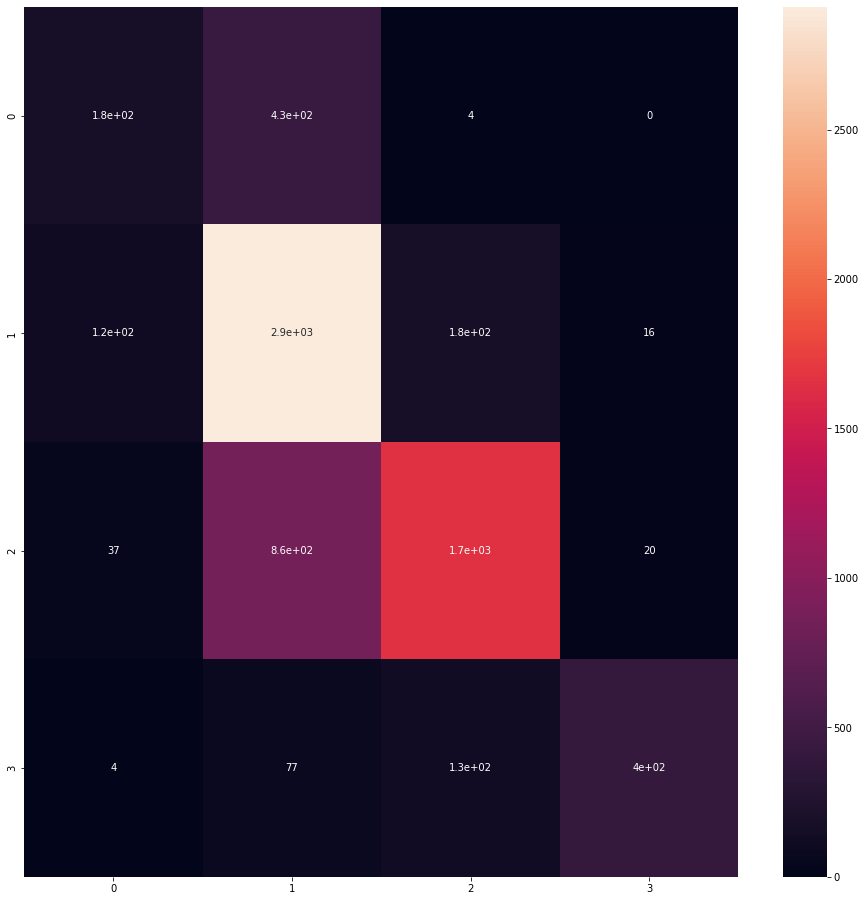

In [208]:
target_preds = np.argmax(targets, axis=1)
conf_matrix = confusion_matrix(new_df['class'], target_preds)
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(conf_matrix, annot=True)

In [210]:
f1_score(new_df['class'], np.argmax(targets, axis=1), average="weighted")

0.7237622383808645

In [211]:
accuracy_score(new_df['class'], np.argmax(targets, axis=1))

0.7337134711332858